<a href="https://colab.research.google.com/github/migvanderlei/rna-2-1/blob/main/rna_rosenblatt_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Artificiais – Atividade Avaliativa 2.1

Autores:
* Leticia Magalhães Mendes - 1815080016
* Miguel Vanderlei de Oliveira - 1815310039

O objetivo deste notebook é implementar o algoritmo de treinamento mediante **Aprendizado Supervisionado** do **neurônio Perceptron de Rosenblatt** aplicado em problemas de **classificação**.


In [ ]:
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install prettytable

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [68]:
class Perceptron():
  def __init__(self, entrada, saida, taxa_aprendizado=0.1, range_pesos=(-1, 1), max_epocas=-1, degrau=0, imprime=True, aleatorio=False):
        self.vies = np.negative(np.ones(len(entrada))).reshape(-1,1)
        self.entrada = np.append(self.vies, entrada, axis = 1)
        self.saida = saida
        self.n_atributos = len(self.entrada[0])
        self.pesos = np.random.uniform(range_pesos[0], range_pesos[1], self.n_atributos)
        self.taxa_aprendizado = taxa_aprendizado
        self.max_epocas = max_epocas
        self.imprime = imprime
        self.degrau = degrau
        self.aleatorio = aleatorio
        self.n_amostras = len(self.entrada)
        self.num_total_ajustes = 0
        self.n_epocas = 0

  def aleatorio_arrays(self, a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

  def ativacao(self, u):
        return 1 if u >= self.degrau else 0

  def treinar(self):
        if self.imprime:
          print("---- Vetor inicial de pesos: ", self.pesos)
        self.n_epocas = 1
        self.num_total_ajustes = 0

        while True:
            erro = False
            n_ajustes = 0

            if self.imprime:
              print(f"---- Época {self.n_epocas} ----")

            if self.aleatorio:
              self.entrada, self.saida = self.aleatorio_arrays(self.entrada, self.saida)

            for i in range(self.n_amostras):
                u = 0
                for j in range(self.n_atributos):
                    u+= self.entrada[i][j] * self.pesos[j]
                
                y = self.ativacao(u)

                if y != self.saida[i]:
                    self.num_total_ajustes+=1
                    if self.imprime:
                      print("Ajuste: ", self.pesos)
                    n_ajustes += 1

                    erro_aux = self.saida[i] - y

                    for j in range(self.n_atributos):
                        self.pesos[j] = self.pesos[j] + self.taxa_aprendizado * erro_aux * self.entrada[i][j]
                    erro = True
  
            if self.imprime:
              print(f"---- Fim da época {self.n_epocas} com {n_ajustes} ajustes ----")
            
            if self.max_epocas == -1:
              if not erro:
                 break
            elif self.n_epocas >= self.max_epocas:
              break

            self.n_epocas+=1

        if self.imprime:
          print("---- Número total de ajustes: ", self.num_total_ajustes)
          if self.max_epocas == -1:
            print("---- Número de épocas até a convergência: ", self.n_epocas-1)

        if not self.imprime:
          return {
              "num_total_ajustes": self.num_total_ajustes,
              "n_epocas": self.n_epocas-1,
              "pesos": self.pesos
          }
          
  def testar(self, entrada):
      vies = np.negative(np.ones(len(entrada))).reshape(-1,1)
      entrada = np.append(vies, entrada, axis = 1)

      saida = np.matmul(entrada, self.pesos)

      return np.array([self.ativacao(item) for item in saida]).reshape(-1, 1)


# Parte I - Problema linearmente separável

In [69]:
dataAll = np.fromfile('data/dataAll.txt').reshape(-1, 3)
entrada = dataAll[: , :2]
saida = dataAll[:,2:]

In [70]:
p = Perceptron(entrada, saida, range_pesos=(-0.5, 0.5))
p.treinar()

---- Vetor inicial de pesos:  [ 0.25697131  0.04235149 -0.23324014]
---- Época 1 ----
Ajuste:  [ 0.25697131  0.04235149 -0.23324014]
Ajuste:  [ 0.15697131 72.83837149 35.59631986]
Ajuste:  [ 5.69713112e-02  7.39916115e+01 -2.32517001e+01]
Ajuste:  [   0.15697131   -9.53799851 -122.37753014]
Ajuste:  [   0.25697131   39.64886149 -105.74880014]
Ajuste:  [  0.15697131 122.24756149 -25.89297014]
Ajuste:  [   0.25697131   82.23865149 -103.78566014]
Ajuste:  [  0.35697131 135.90846149 -54.69339014]
Ajuste:  [   0.25697131   82.94840149 -111.56285014]
Ajuste:  [  0.35697131 142.50792149 -61.44052014]
Ajuste:  [   0.25697131  110.02993149 -134.89634014]
Ajuste:  [ 1.56971311e-01  1.81404441e+02 -7.03542201e+01]
---- Fim da época 1 com 12 ajustes ----
---- Época 2 ----
---- Fim da época 2 com 0 ajustes ----
---- Número total de ajustes:  12
---- Número de épocas até a convergência:  1


In [71]:
def plot(data, pesos, titulo=''):
  x = np.arange(min(data[:,:1]),max(data[:,:1]), 0.1)

  plt.plot(x, pesos[0]/pesos[2] - (pesos[1]/pesos[2] * x), 'k', linewidth=2)

  for item in data:
    if item[2] == 0:
      plt.scatter(item[0], item[1], color="red")
    else:
      plt.scatter(item[0], item[1], color="blue")

  if titulo:
    plt.title(titulo)

  plt.show()

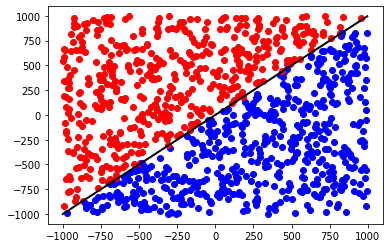

In [72]:
plot(dataAll, p.pesos)

# Parte II - Experimentação

In [73]:
n = int((6+9)/4) # 3

data = np.fromfile(f"data/data{n}.txt").reshape(-1, 3)
entrada = data[:, :2]
saida = data[:, 2:]

In [74]:
conjunto_taxas = [0.4, 0.1, 0.01]
conjunto_pesos = [(-100, 100), (-0.5, 0.5)]

conjunto_parametros = []

for taxa in conjunto_taxas:
  for pesos in conjunto_pesos:
    conjunto_parametros.append(
        {
            "params": f"taxa: {taxa} - pesos: {pesos}",
            "taxa": taxa,
            "pesos": pesos
        }
    )
print(conjunto_parametros)

[{'params': 'taxa: 0.4 - pesos: (-100, 100)', 'taxa': 0.4, 'pesos': (-100, 100)}, {'params': 'taxa: 0.4 - pesos: (-0.5, 0.5)', 'taxa': 0.4, 'pesos': (-0.5, 0.5)}, {'params': 'taxa: 0.1 - pesos: (-100, 100)', 'taxa': 0.1, 'pesos': (-100, 100)}, {'params': 'taxa: 0.1 - pesos: (-0.5, 0.5)', 'taxa': 0.1, 'pesos': (-0.5, 0.5)}, {'params': 'taxa: 0.01 - pesos: (-100, 100)', 'taxa': 0.01, 'pesos': (-100, 100)}, {'params': 'taxa: 0.01 - pesos: (-0.5, 0.5)', 'taxa': 0.01, 'pesos': (-0.5, 0.5)}]


In [75]:
resultados = []

for config in conjunto_parametros:
  resultados_conjunto = []
  for i in range(10):
    p = Perceptron(entrada, saida, taxa_aprendizado=config['taxa'], range_pesos=config['pesos'], imprime=False)
    resultados_conjunto.append(
        p.treinar()
    )
  resultados.append(resultados_conjunto)

print(resultados)

[[{'num_total_ajustes': 278, 'n_epocas': 13, 'pesos': array([  9.89383292,  36.27194583, -12.33701658])}, {'num_total_ajustes': 212, 'n_epocas': 8, 'pesos': array([16.20469385, 61.08877467, -9.43385837])}, {'num_total_ajustes': 130, 'n_epocas': 16, 'pesos': array([69.67270009, 92.37558703, 35.95265465])}, {'num_total_ajustes': 287, 'n_epocas': 6, 'pesos': array([ 8.94890431, 12.08286589,  4.17004906])}, {'num_total_ajustes': 59, 'n_epocas': 14, 'pesos': array([ 47.759888  , 104.91474452, -16.63984285])}, {'num_total_ajustes': 184, 'n_epocas': 7, 'pesos': array([21.92696073, 29.26240932, 11.24575363])}, {'num_total_ajustes': 413, 'n_epocas': 11, 'pesos': array([27.79964616, 37.1623212 , 13.99948081])}, {'num_total_ajustes': 124, 'n_epocas': 5, 'pesos': array([  8.69888021,  31.01685734, -10.40022213])}, {'num_total_ajustes': 695, 'n_epocas': 10, 'pesos': array([ 4.26170707, 15.10195178, -4.63674311])}, {'num_total_ajustes': 427, 'n_epocas': 6, 'pesos': array([13.5396835 , 18.26463892,  

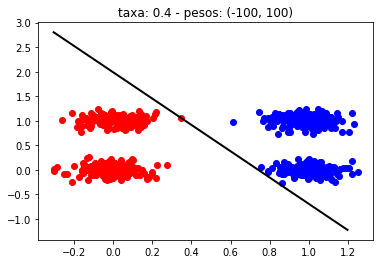

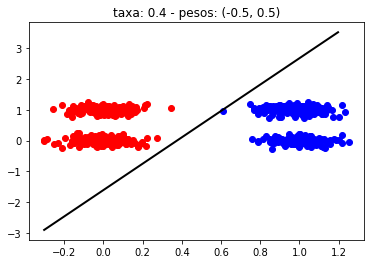

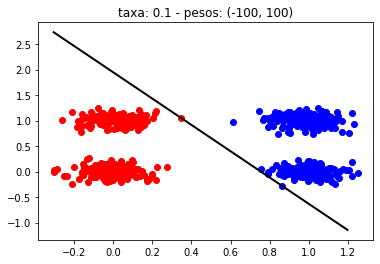

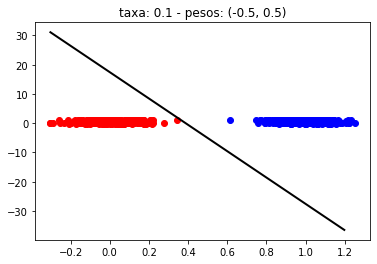

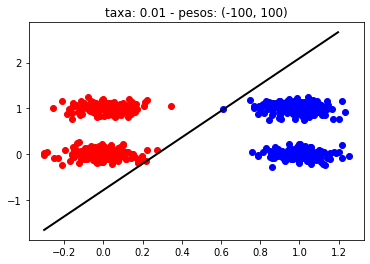

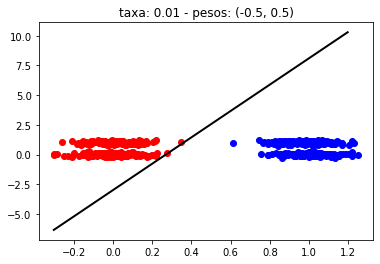

In [76]:
for resultado, idx in zip(resultados, range(6)):
  plot(data, resultado[-1]["pesos"], conjunto_parametros[idx]["params"])

In [77]:
tabela = PrettyTable()
tabela.field_names = ['Taxa de Aprendizado', 'Intervalo de Pesos', 'Quantidade de Ajustes', 'Menor número de épocas para convergência']
for resultado, idx in zip(resultados, range(6)):
  ajustes = []
  minimo = None
  for p in resultado:
    ajustes.append(p['num_total_ajustes'])
    if minimo is None:
      minimo = p['n_epocas']
    else:
      minimo = min(minimo, p['n_epocas'])
  ajustes = np.array(ajustes)
  media = "%.2f" %(np.mean(ajustes))
  dp = "%.2f" %(np.std(ajustes))
  tabela.add_row([conjunto_parametros[idx]['taxa'], conjunto_parametros[idx]['pesos'], media + " +- " + dp, minimo])

print(tabela)

+---------------------+--------------------+-----------------------+------------------------------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Quantidade de Ajustes | Menor número de épocas para convergência |
+---------------------+--------------------+-----------------------+------------------------------------------+
|         0.4         |    (-100, 100)     |    280.90 +- 179.19   |                    5                     |
|         0.4         |    (-0.5, 0.5)     |      6.20 +- 3.31     |                    1                     |
|         0.1         |    (-100, 100)     |   1233.60 +- 873.03   |                    7                     |
|         0.1         |    (-0.5, 0.5)     |     11.90 +- 5.91     |                    1                     |
|         0.01        |    (-100, 100)     |  14685.70 +- 6855.86  |                    42                    |
|         0.01        |    (-0.5, 0.5)     |     69.50 +- 31.93    |                    1               

# Parte III – Validação Holdout em Problema Não-Linearmente Separável

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [99]:
dataHoldout = np.fromfile('data/dataHoldout.txt').reshape(-1, 3)

import random
random.shuffle(dataHoldout)

X = dataHoldout[: , :2]
y = dataHoldout[:,2:]

X_train = X[:int(len(X)*0.7)]
X_test = X[int(len(X)*0.7):]

y_train = y[:int(len(y)*0.7)]
y_test = y[int(len(y)*0.7):]

In [88]:
p = Perceptron(X_train, y_train, max_epocas=100, aleatorio=True)
p.treinar()

---- Vetor inicial de pesos:  [-0.263246    0.65652166  0.47691425]
---- Época 1 ----
Ajuste:  [-0.263246    0.65652166  0.47691425]
Ajuste:  [-0.163246    0.67637214  0.33508721]
Ajuste:  [-0.263246    0.66140494  0.31557476]
Ajuste:  [-0.163246    0.63504322  0.21637902]
Ajuste:  [-0.063246    0.60805726  0.12927645]
Ajuste:  [0.036754   0.60330842 0.0531684 ]
Ajuste:  [-0.063246    0.59783584  0.04203718]
Ajuste:  [ 0.036754    0.57147412 -0.05715855]
Ajuste:  [-0.063246    0.54885878 -0.04222346]
Ajuste:  [-0.163246    0.51950194 -0.04162414]
Ajuste:  [-0.063246    0.42769387 -0.00468655]
Ajuste:  [ 0.036754    0.41797563 -0.11205237]
Ajuste:  [-0.063246    0.35573822 -0.09993286]
Ajuste:  [ 0.036754   0.2568879 -0.1148501]
Ajuste:  [-0.063246    0.26498506 -0.08399565]
Ajuste:  [-0.163246    0.246208   -0.04130782]
Ajuste:  [-0.063246    0.25375256 -0.12498572]
Ajuste:  [ 0.036754    0.23632752 -0.20855646]
Ajuste:  [-0.063246    0.23672202 -0.19446663]
Ajuste:  [-0.163246    0.21

In [89]:
y_pred = p.testar(X_test)

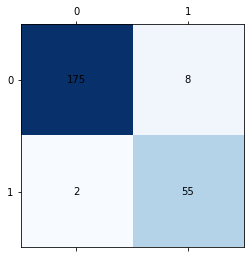

In [90]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
plt.matshow(cm, cmap=plt.cm.Blues)

for (x, y), value in np.ndenumerate(cm):
    plt.text(y, x, f"{value}", va="center", ha="center")

plt.show()

In [93]:
print("Acurácia: {:.3f}".format(accuracy_score(y_pred, y_test)))

print("Precisão: {:.3f}".format(precision_score(y_pred, y_test)))
print("Revocação: {:.3f}".format(recall_score(y_pred, y_test)))
print("F1-Score: {:.3f}".format(f1_score(y_pred, y_test)))

Acurácia: 0.958
Precisão: 0.965
Revocação: 0.873
F1-Score: 0.917


**Discussão:** 

* A matriz de confusão apresentada mostra que houveram poucos falsos positivos e falsos negativos. Logo, o neurônio acerta boa parte das previsões;
* As métricas de acurácia e precisão novamente demonstram que o neurônio tem altas taxas de acerto;
* O *F1-Score* mostra a efetividade do neurônio ao balancear precisão e revocação.

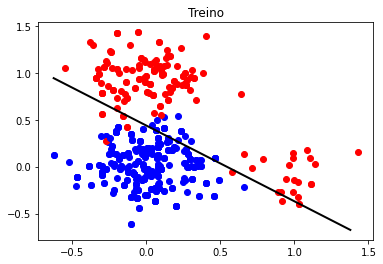

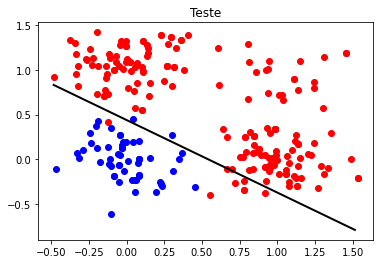

In [96]:
data_teste = np.append(X_test, y_test, axis=1)
data_treino = np.append(X_train, y_train, axis=1)

plot(data_treino, p.pesos, "Treino")
plot(data_teste, p.pesos, "Teste")